## Notebook Imports

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
#Importing the boston house dataset
boston=load_boston()

In [3]:
#Checking the type of the dataset
type(boston)

sklearn.utils.Bunch

## Exploring the dataset

In [4]:
#Taking a look at the attributes of this sklearn.utils.Bunch object
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Sample and Variables

In [6]:
type(boston.data)


numpy.ndarray

In [7]:
#Since boston.data is numpy array we can use the attribute 'shape.'
boston.data.shape

(506, 13)

In [8]:
#Taking a look at the variable names, the target variable is not included among them
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
#The target variable (the house prices) in thousand of dollars
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with Pandas


In [10]:
#Creating a pandas dataframe
data=pd.DataFrame(data=boston.data, columns=boston.feature_names)

#Adding our target variable as well.
data['PRICE']=boston.target

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
#Number of rows for each column
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning Data - Checking for NA's

In [14]:
#We use the pandas isnull function which returns True's and False's for each datapoint. Then we use the any function.
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
#General information about the pandas object at hand.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Visualising Data

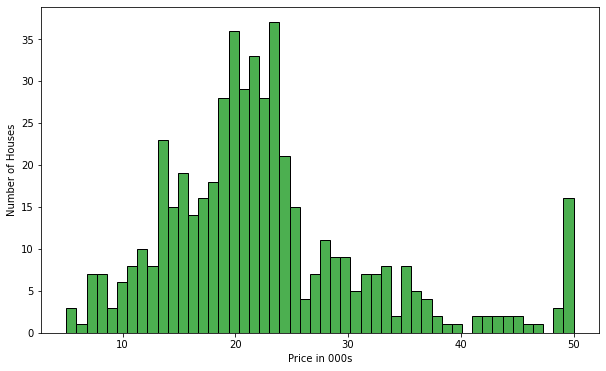

In [16]:
#Histogram with matplotlib
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#4CAF50')
plt.xlabel('Price in 000s')
plt.ylabel('Number of Houses')
plt.show()

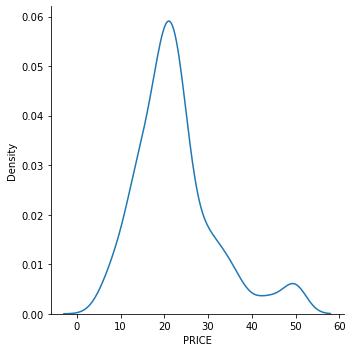

In [17]:
#Plots with seaborn

sns.displot(data['PRICE'], kind="kde")

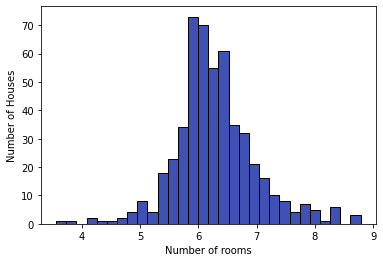

In [18]:
plt.hist(data['RM'], bins=30, ec='black', color='#3F51B5')
plt.xlabel('Number of rooms')
plt.ylabel('Number of Houses')
plt.show()

In [19]:
#Average number of rooms corresponds with the plot above.
data['RM'].mean()

6.284634387351787

In [20]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

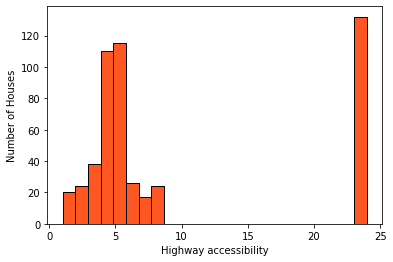

In [21]:
#Histogram for the variable 'RAD'
#The bins should be equal to the number of distinct values since we are dealing with an index here.

plt.hist(data['RAD'], bins=24, ec='black', color='#FF5722')

plt.xlabel('Highway accessibility')
plt.ylabel('Number of Houses')
plt.show()

In [22]:
frequency=data['RAD'].value_counts()

In [23]:
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

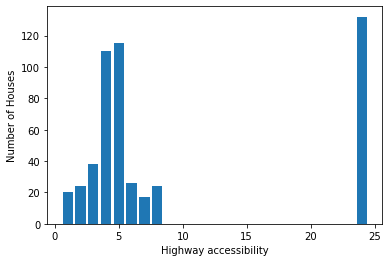

In [24]:
plt.bar(frequency.index, height=frequency)
plt.xlabel('Highway accessibility')
plt.ylabel('Number of Houses')
plt.show()

In [25]:
#35 properties are located next to the river.
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [26]:
#Properties next to the river are more expensive on average
print('Average price for properties, Next to the river:',data[data['CHAS']==1]['PRICE'].mean(),',Away from the river:',data[data['CHAS']==0]['PRICE'].mean())



Average price for properties, Next to the river: 28.44 ,Away from the river: 22.093842887473482


### Descriptive Statistics

In [27]:
#Lowest price value
data['PRICE'].min()

5.0

In [28]:
#Highest price value
data['PRICE'].max()

50.0

In [29]:
#Min value in every column
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [30]:
#Using the describe method, we get descriptive statistics for all the columns.
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

In [31]:
#Correlation between prices and number of rooms
data['PRICE'].corr(data['RM'])

0.6953599470715394

In [32]:
#Correlation between prices and the pupil/teacher ratios
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [33]:
#Correlation matrix
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
#Getting rid of the duplicate values
#Creating an array of zeros that is structured as the correlation matrix of the data
mask=np.zeros_like(data.corr())

#Retrieving the indices for the top triangle in order to fill the top half of the mask array with 1's.
triangle_indices=np.triu_indices_from(mask)

mask[triangle_indices]=True

In [35]:
#We can see that the top half of the matrix has 1's. Using this we can select the top half of the correlation matrix
#in order to avoid the duplicate values.
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

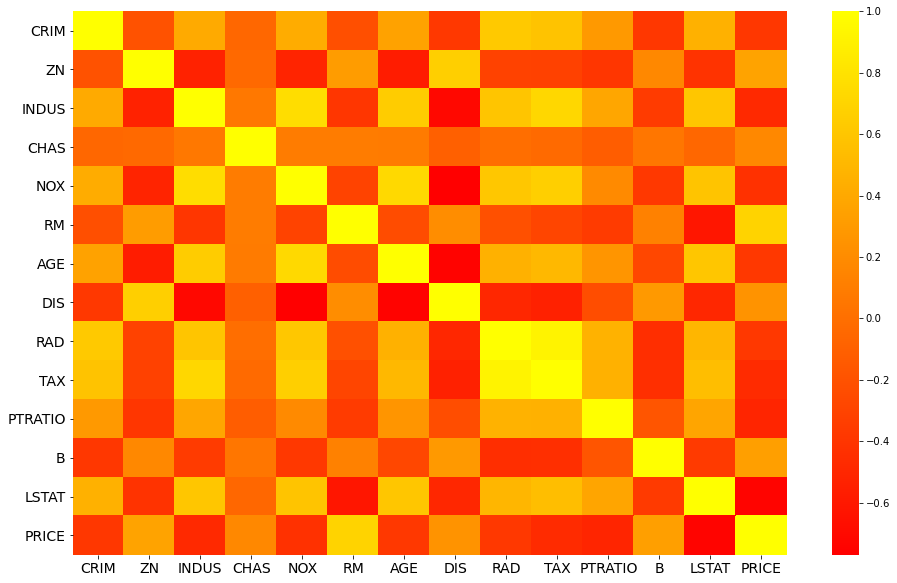

In [36]:
#Heatmap of the whole matrix
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),cmap='autumn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

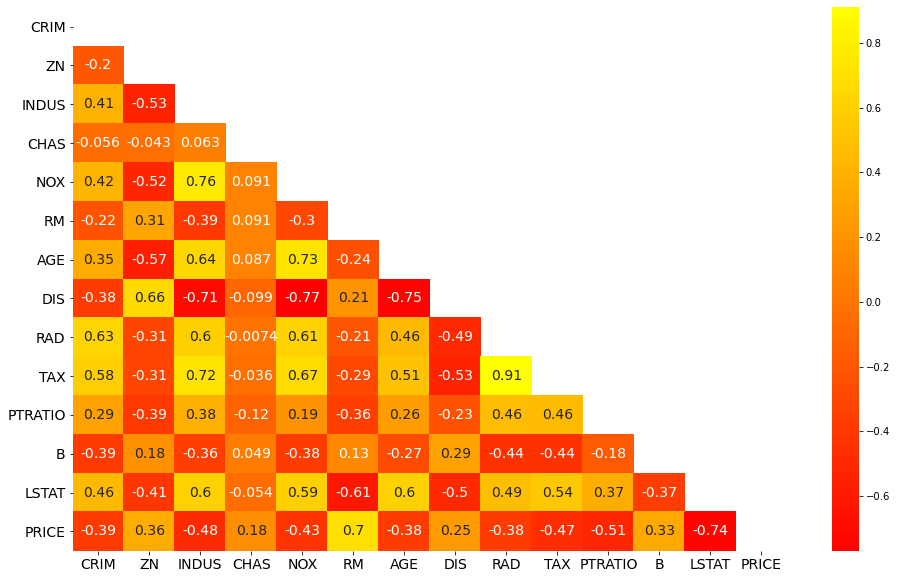

In [37]:
#Heatmap of the matrix without the duplicate values
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,cmap='autumn', annot=True, annot_kws={'size': 14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#Note: Correlation figures are meaningless for discrete and dummy variables

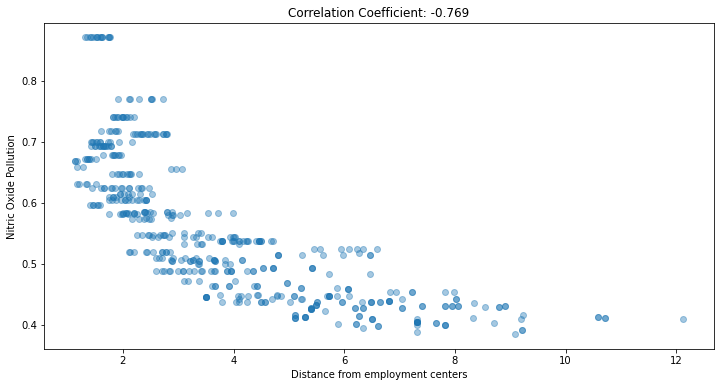

In [38]:
#Scatterplots
nox_dis_corr=round(data['DIS'].corr(data['NOX']),3)

plt.figure(figsize=(12,6))
plt.scatter(data['DIS'], data['NOX'], alpha=0.4)
plt.title(f'Correlation Coefficient: {nox_dis_corr}')
plt.xlabel('Distance from employment centers')
plt.ylabel('Nitric Oxide Pollution')
plt.show()

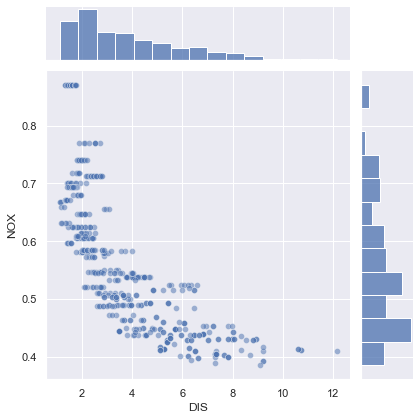

In [39]:
#Generating the scatterplot using seaborn
#Sns returns the default settings of seaborn
sns.set()
sns.jointplot(x=data['DIS'],y=data['NOX'],joint_kws={'alpha':0.5})
plt.show()

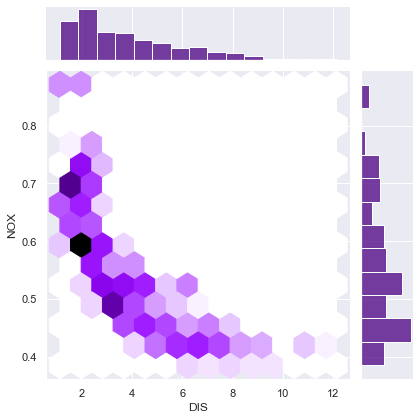

In [40]:
#Using a different kind
sns.set()
sns.jointplot(x=data['DIS'],y=data['NOX'],color='indigo', kind='hex')
plt.show()


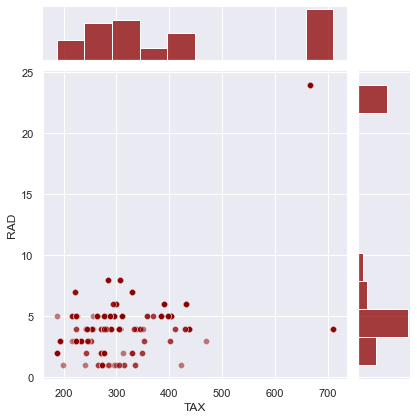

In [41]:
#plotting RAD against TAX
sns.jointplot(x=data['TAX'],y=data['RAD'],joint_kws={'alpha':0.5}, color='darkred')
plt.show()

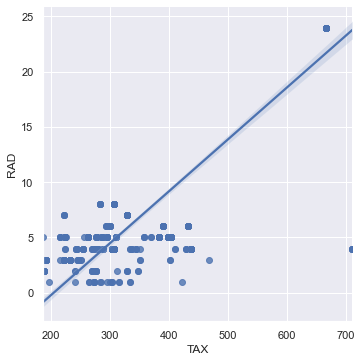

In [42]:
sns.lmplot(x='TAX', y='RAD', data=data)
plt.show()

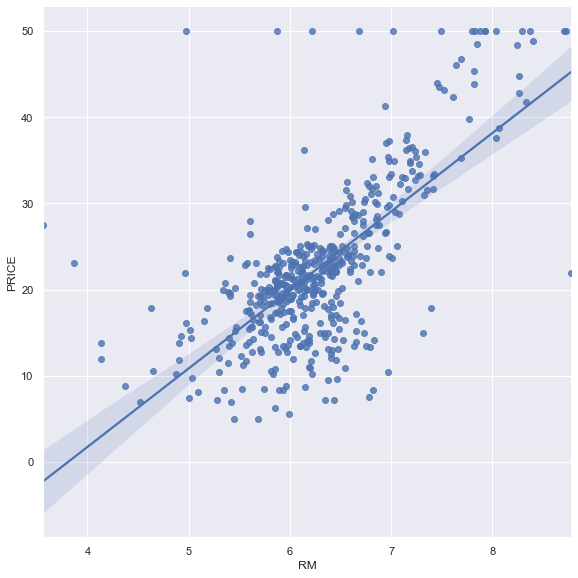

In [43]:
sns.lmplot(x='RM', y='PRICE', data=data, height=8)
plt.show()

### Splitting the dataset 


In [44]:
prices=data['PRICE']
#The axis=1 indicates that we are dropping a column and not a row.
vars_x=data.drop('PRICE', axis=1)

#We use the function train_test_split  from sklearn to split the dataset. 
#The shuffle is random unless the argument random_state is called.
X_train, X_test, y_train, y_test=train_test_split(vars_x, prices, test_size=0.2, random_state=10)


## Running the regression

In [45]:
regr=LinearRegression()
regr.fit(X_train, y_train)


#We print the intercept
print(regr.intercept_)

#We create a pandas dataframe with the coefficients.
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

36.533051382824624


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [46]:
print('R-Squared of the regression:',regr.score(X_train,y_train))


R-Squared of the regression: 0.750121534530608


In [47]:
print('R-Squared of the test data:',regr.score(X_test,y_test))
print('As expected, the R squared of the testing data is lower than the Rsquared of the training data since the model has been trained on the training data.')

R-Squared of the test data: 0.6709339839115631
As expected, the R squared of the testing data is lower than the Rsquared of the training data since the model has been trained on the training data.


## Data Transformations

In [48]:
#Measuring the skew
data['PRICE'].skew()

1.1080984082549072

In [49]:
#Applying log transformation in order to reduce the skewness
y_log=np.log(data['PRICE'])

print('The skewness after the transformation:',y_log.skew())

The skewness after the transformation: -0.33032129530987864


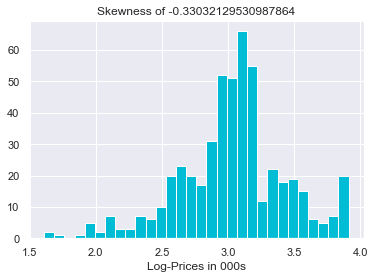

In [50]:
plt.hist(y_log, color='#00BCD4', bins=30)
plt.xlabel('Log-Prices in 000s')
plt.title(f'Skewness of {y_log.skew()}')
plt.show()


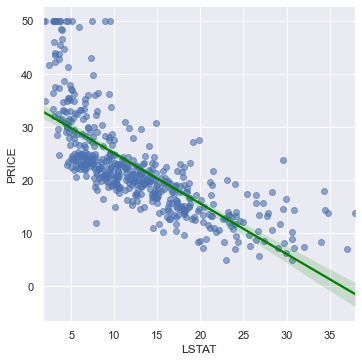

In [51]:
#Scatter plot between Prices and LSTAT
sns.lmplot(x='LSTAT', y='PRICE',data=data,scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.show()

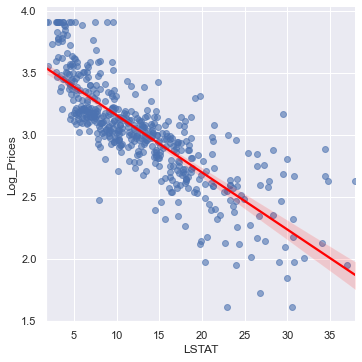

In [52]:
#Scatter plot between log-Prices and LSTAT
trans_df=vars_x
trans_df['Log_Prices']=y_log


sns.lmplot(x='LSTAT', y='Log_Prices',data=trans_df ,scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.show()

### Running the mutlivariable regression with the transformed prices

In [53]:
#Rerunning the regression with the transformed prices

prices=np.log(data['PRICE'])
#The axis=1 indicates that we are dropping a column and not a row.
vars_x=data.drop('PRICE', axis=1)

#We use the function train_test_split  from sklearn to split the dataset. 
#The shuffle is random unless the argument random_state is called.
X_train, X_test, y_train, y_test=train_test_split(vars_x, prices, test_size=0.2, random_state=10)


In [54]:
regr=LinearRegression()
regr.fit(X_train, y_train)


#We print the intercept
print(regr.intercept_)

#We create a pandas dataframe with the coefficients.
print(pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef']))



print('R-Squared of the regression:',regr.score(X_train,y_train))
print('R-Squared of the test data:',regr.score(X_test,y_test))

print('The R-Square of the model has increased on both the training and the testing data.')

4.059943871775191
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390
R-Squared of the regression: 0.7930234826697583
R-Squared of the test data: 0.7446922306260717
The R-Square of the model has increased on both the training and the testing data.


### P-Values and coefficient evaluation

In [55]:
#We will use the statsmodels module
X_plus_const=sm.add_constant(X_train)
model=sm.OLS(y_train, X_plus_const)

results=model.fit()


In [56]:

overview=pd.DataFrame({'Coef':results.params, 'P-Value':round(results.pvalues, 3)})
overview

,Coef,P-Value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


### Testing for Multicollinearity



In [57]:
#We will use the Variance Inflation Factor
#The first argument is the variables and the second the index of the variable that we want to check for multicollinearity
#We turn the pandas dataframe into an numpy array first 

variance_inflation_factor(exog=X_plus_const.to_numpy(), exog_idx=1)

1.7145250443932485

In [58]:
#Finding the VIF for all the variables
n_col=len(data.columns)

vif_array=[variance_inflation_factor(exog=X_plus_const.to_numpy(), exog_idx=j) for j in range(n_col)]

print(vif_array)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000576, 4.410320817897634, 1.8404053075678564, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.338671325536472, 2.812544292793035]


In [59]:
vif=pd.DataFrame({'Variables':X_plus_const.columns,'VIF':vif_array})
print(vif)

   Variables         VIF
0      const  597.548713
1       CRIM    1.714525
2         ZN    2.332822
3      INDUS    3.943449
4       CHAS    1.078813
5        NOX    4.410321
6         RM    1.840405
7        AGE    3.326766
8        DIS    4.222923
9        RAD    7.314300
10       TAX    8.508856
11   PTRATIO    1.839912
12         B    1.338671
13     LSTAT    2.812544


### Bayesian Information Criterion for Model Selection

In [60]:
#Original model with log-prices and all the variables included
X_plus_const=sm.add_constant(X_train)
model=sm.OLS(y_train, X_plus_const)

results=model.fit()

original_coef=pd.DataFrame({'Coef':results.params, 'P-Value':round(results.pvalues, 3)})
print(original_coef)

             Coef  P-Value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000


In [61]:
print('Bayesian Information Criterion of the original model :',results.bic)
print('R-Squared of the original model:',results.rsquared)

Bayesian Information Criterion of the original model : -139.74997769478898
R-Squared of the original model: 0.7930234826697583


In [62]:
#Reduced Model without INDUS (MODEL 1)

X_plus_const=sm.add_constant(X_train)
X_plus_const=X_plus_const.drop(['INDUS'], axis=1)

model=sm.OLS(y_train, X_plus_const)

results=model.fit()

model_one_coef=pd.DataFrame({'Coef':results.params, 'P-Value':round(results.pvalues, 3)})
print(model_one_coef)

             Coef  P-Value
const    4.056231    0.000
CRIM    -0.010721    0.000
ZN       0.001551    0.010
CHAS     0.082795    0.032
NOX     -0.673365    0.000
RM       0.071739    0.000
AGE      0.000766    0.207
DIS     -0.049394    0.000
RAD      0.014014    0.000
TAX     -0.000596    0.000
PTRATIO -0.034126    0.000
B        0.000511    0.000
LSTAT   -0.031262    0.000


In [63]:
print('Bayesian Information Criterion of reduced model 1 :',results.bic)
print('R-Squared of of reduced model 1:',results.rsquared)

Bayesian Information Criterion of reduced model 1 : -145.14508855591163
R-Squared of of reduced model 1: 0.7927126289415163


In [64]:
#Reduced Model without INDUS and AGE (MODEL 2)

X_plus_const=sm.add_constant(X_train)
X_plus_const=X_plus_const.drop(['AGE', 'INDUS'], axis=1)

model=sm.OLS(y_train, X_plus_const)

results=model.fit()

model_two_coef=pd.DataFrame({'Coef':results.params, 'P-Value':round(results.pvalues, 3)})
print(model_two_coef)

             Coef  P-Value
const    4.035922    0.000
CRIM    -0.010702    0.000
ZN       0.001461    0.014
CHAS     0.086449    0.025
NOX     -0.616448    0.000
RM       0.076133    0.000
DIS     -0.052692    0.000
RAD      0.013743    0.000
TAX     -0.000590    0.000
PTRATIO -0.033481    0.000
B        0.000518    0.000
LSTAT   -0.030271    0.000


In [65]:
print('Bayesian Information Criterion of reduced model 2 :',results.bic)
print('R-Squared of of reduced model 2:',results.rsquared)

print('Removing AGE and INDUS has reduced the BIC while the R-Sqaured has stayed the same. \nThis means that we can safely drop those two variables')

Bayesian Information Criterion of reduced model 2 : -149.49934294224678
R-Squared of of reduced model 2: 0.7918657661852815
Removing AGE and INDUS has reduced the BIC while the R-Sqaured has stayed the same. 
This means that we can safely drop those two variables


In [66]:
#Comparing the beta values of all the different models
combined=[original_coef,model_one_coef,model_two_coef]
print(pd.concat(combined, axis=1))
print('We observe that there are no great shifts to the estimates between the models, which is positive.')

             Coef  P-Value      Coef  P-Value      Coef  P-Value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000
We observe that there are

### Residual Diagnostics

In [67]:
#Model with log-prices and without 2 variables ('INDUS' AND 'AGE')

prices=np.log(data['PRICE'])
#The axis=1 indicates that we are dropping a column and not a row.
vars_x=data.drop(['PRICE','INDUS', 'AGE'], axis=1)

#We use the function train_test_split  from sklearn to split the dataset. 
#The shuffle is random unless the argument random_state is called.
X_train, X_test, y_train, y_test=train_test_split(vars_x, prices, test_size=0.2, random_state=10)


X_plus_const=sm.add_constant(X_train)
model=sm.OLS(y_train, X_plus_const)
results=model.fit()


reduced_model_mse=round(results.mse_resid,3)
reduced_model_rsq=round(results.rsquared,3)

In [68]:
#Taking a look at the residuals
results.resid


50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

In [69]:
corr_actual_predicted=round(y_train.corr(results.fittedvalues) , 2)
corr_actual_predicted

0.89

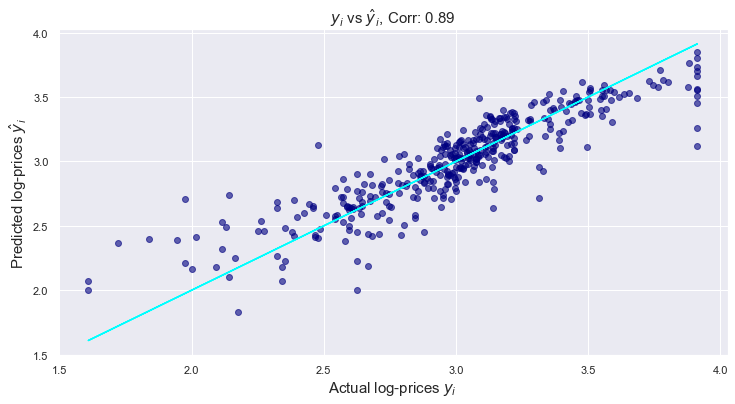

In [70]:
#Graph of actual vs predicted log-prices
plt.figure(figsize=(12,6))
plt.scatter(y_train, results.fittedvalues, alpha=0.6, color='navy')
plt.xlabel('Actual log-prices $y_i$',fontsize=15)
plt.ylabel('Predicted log-prices $\hat y_i$',fontsize=15 )
plt.plot(y_train,y_train, color='cyan')
plt.title(f'$y_i$ vs $\hat y_i$, Corr: {corr_actual_predicted}',fontsize=15)
plt.show()

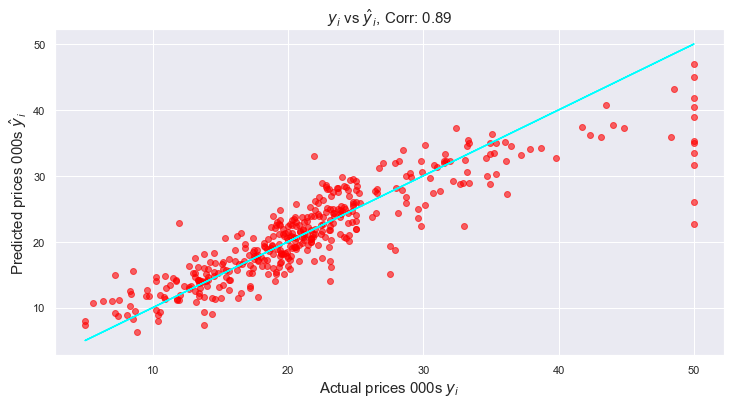

In [71]:
#Graph of actual vs predicted prices
plt.figure(figsize=(12,6))
plt.scatter(np.exp(y_train), np.exp(results.fittedvalues), alpha=0.6, color='red')
plt.xlabel('Actual prices 000s $y_i$',fontsize=15)
plt.ylabel('Predicted prices 000s $\hat y_i$',fontsize=15 )
plt.plot(np.exp(y_train),np.exp(y_train), color='cyan')
plt.title(f'$y_i$ vs $\hat y_i$, Corr: {corr_actual_predicted}',fontsize=15)
plt.show()

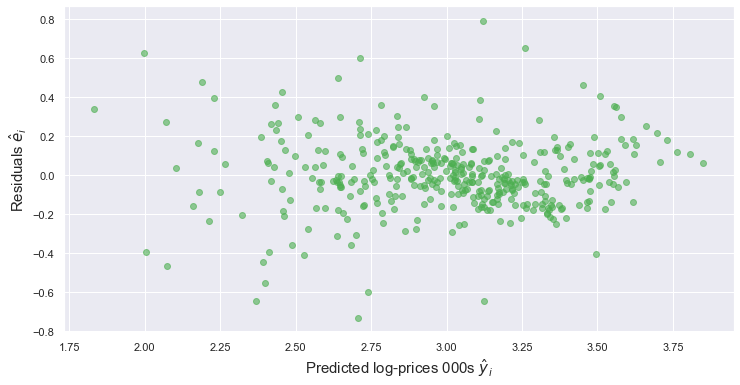

In [72]:
#Residuals vs Predicted Values
plt.figure(figsize=(12,6))
plt.scatter(results.fittedvalues,results.resid ,alpha=0.6, color='#4CAF50')
plt.ylabel('Residuals $\hat e_i$',fontsize=15)
plt.xlabel('Predicted log-prices 000s $\hat y_i$',fontsize=15 )
plt.show()

In [73]:
#Checking the normality of the residuals
print('Mean of the residuals',results.resid.mean())
print("Skewness of the residual's distibution", results.resid.skew())

Mean of the residuals -4.404617484824754e-15
Skewness of the residual's distibution 0.1177587620118496


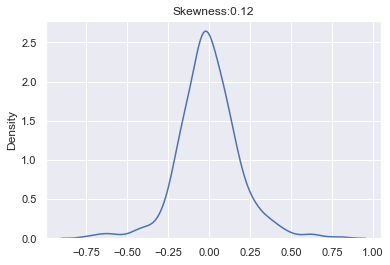

In [74]:
#Checking the distribution of the residuals
sns.kdeplot(results.resid)
plt.title(f'Skewness:{round(results.resid.skew(),2)}')
plt.show()

### Residual diagnostics for the original model

In [75]:


prices=data['PRICE']
#The axis=1 indicates that we are dropping a column and not a row.
vars_x=data.drop('PRICE', axis=1)

#We use the function train_test_split  from sklearn to split the dataset. 
#The shuffle is random unless the argument random_state is called.
X_train, X_test, y_train, y_test=train_test_split(vars_x, prices, test_size=0.2, random_state=10)


X_plus_const=sm.add_constant(X_train)
model=sm.OLS(y_train, X_plus_const)
results=model.fit()


original_model_mse=round(results.mse_resid,3)
original_model_rsq=round(results.rsquared,3)

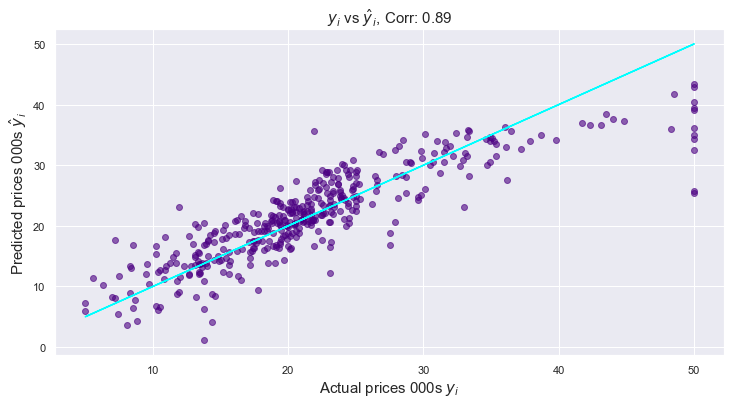

In [76]:
#Graph of actual vs predicted prices
plt.figure(figsize=(12,6))
plt.scatter(y_train, results.fittedvalues, alpha=0.6, color='indigo')
plt.xlabel('Actual prices 000s $y_i$',fontsize=15)
plt.ylabel('Predicted prices 000s $\hat y_i$',fontsize=15 )
plt.plot(y_train,y_train, color='cyan')
plt.title(f'$y_i$ vs $\hat y_i$, Corr: {corr_actual_predicted}',fontsize=15)
plt.show()

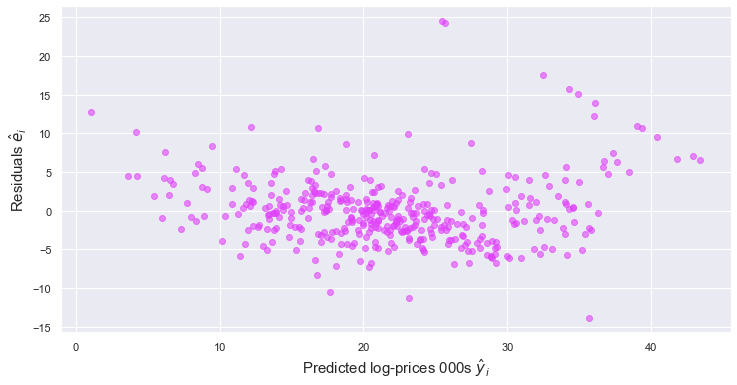

In [77]:
#Residuals vs Predicted Values
plt.figure(figsize=(12,6))
plt.scatter(results.fittedvalues,results.resid ,alpha=0.6, color='#E040FB')
plt.ylabel('Residuals $\hat e_i$',fontsize=15)
plt.xlabel('Predicted log-prices 000s $\hat y_i$',fontsize=15 )
plt.show()

In [78]:
#Checking the normality of the residuals
print('Mean of the residuals',results.resid.mean())
print("Skewness of the residual's distibution", results.resid.skew())

Mean of the residuals 7.474768878664421e-17
Skewness of the residual's distibution 1.4594428196679803


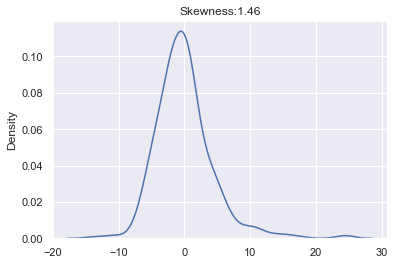

In [79]:
#Checking the distribution of the residuals
sns.kdeplot(results.resid)
plt.title(f'Skewness:{round(results.resid.skew(),2)}')
plt.show()

In [80]:
print('The original model has much more skewed reiduals than the transformed.\nAnother proof that transforming the model was beneficial.')

The original model has much more skewed reiduals than the transformed.
Another proof that transforming the model was beneficial.


### Using a model that lacks key variables

In [81]:


prices=np.log(data['PRICE'])
#The axis=1 indicates that we are dropping a column and not a row.
vars_x=data.drop(['PRICE','INDUS', 'AGE', 'LSTAT','RM','NOX','CRIM'], axis=1)

#We use the function train_test_split  from sklearn to split the dataset. 
#The shuffle is random unless the argument random_state is called.
X_train, X_test, y_train, y_test=train_test_split(vars_x, prices, test_size=0.2, random_state=10)


X_plus_const=sm.add_constant(X_train)
model=sm.OLS(y_train, X_plus_const)
results=model.fit()


omitted_model_mse=round(results.mse_resid,3)
omitted_model_rsq=round(results.rsquared,3)

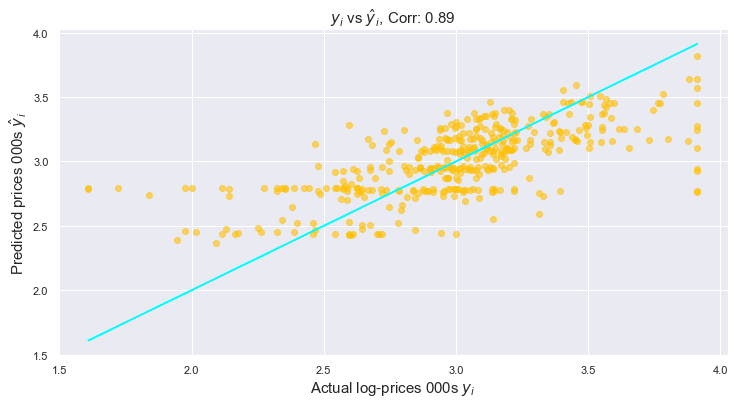

In [82]:
#Graph of actual vs predicted prices
plt.figure(figsize=(12,6))
plt.scatter(y_train, results.fittedvalues, alpha=0.6, color='#FFC107')
plt.xlabel('Actual log-prices 000s $y_i$',fontsize=15)
plt.ylabel('Predicted prices 000s $\hat y_i$',fontsize=15 )
plt.plot(y_train,y_train, color='cyan')
plt.title(f'$y_i$ vs $\hat y_i$, Corr: {corr_actual_predicted}',fontsize=15)
plt.show()

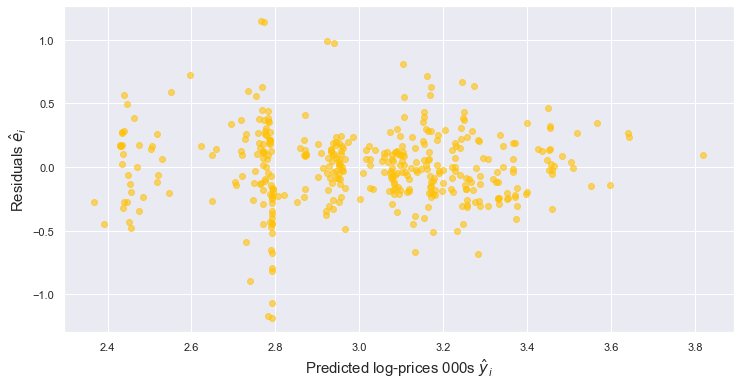

In [83]:
#Residuals vs Predicted Values
plt.figure(figsize=(12,6))
plt.scatter(results.fittedvalues,results.resid ,alpha=0.6, color='#FFC107')
plt.ylabel('Residuals $\hat e_i$',fontsize=15)
plt.xlabel('Predicted log-prices 000s $\hat y_i$',fontsize=15 )
plt.show()

In [84]:
print(pd.DataFrame({'MSE':[reduced_model_mse, original_model_mse,omitted_model_mse], 'R-Squared':[reduced_model_rsq,original_model_rsq,omitted_model_rsq],'Root MSE':np.sqrt([reduced_model_mse, original_model_mse,omitted_model_mse])},index=['Reduced Log-Price Model', 'Original Normal-Price Model', 'Omitted Variables Model']))
print("The second model's MSE is in 000s dollars while the other ones have been transformed. Hence they cannot be compared.")


                                MSE  R-Squared  Root MSE
Reduced Log-Price Model       0.035      0.792  0.187083
Original Normal-Price Model  19.921      0.750  4.463295
Omitted Variables Model       0.090      0.460  0.300000
The second model's MSE is in 000s dollars while the other ones have been transformed. Hence they cannot be compared.
